In [30]:
import folium
import earthpy as et
import os
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [31]:
geopandas.datasets.available
nybb = geopandas.read_file(geopandas.datasets.get_path('nybb'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [43]:
descargas_py = pd.read_csv(os.path.join(et.io.HOME,'earth-analytics', 'data','earthpy-downloads','paraguay.csv'))
coordinates = geopandas.points_from_xy(descargas_py.Longitude, descargas_py.Latitude)
descargas_gpd = geopandas.GeoDataFrame(data = descargas_py, geometry = coordinates)
descargas_py

,LightningTime,Latitude,Longitude,Height,FlashType,Amplitude,geometry
0,2022-06-01T11:39:46.020149513,-25.06598,-55.48972,0,0,13177,POINT (-55.48972 -25.06598)
1,2022-06-01T11:39:47.434044794,-25.63992,-55.01918,7134,1,37518,POINT (-55.01918 -25.63992)
2,2022-06-01T11:39:49.433415065,-24.87441,-55.40839,0,0,-34234,POINT (-55.40839 -24.87441)
3,2022-06-01T11:39:50.661510893,-25.89717,-55.13200,4576,1,11893,POINT (-55.13200 -25.89717)
4,2022-06-01T11:39:56.733833993,-26.41831,-53.60144,12384,1,-3608,POINT (-53.60144 -26.41831)
...,...,...,...,...,...,...,...
348,2022-06-01T11:39:41.486678448,-26.12104,-53.56278,16056,1,6413,POINT (-53.56278 -26.12104)
349,2022-06-01T11:39:41.956948994,-24.80540,-52.70646,15723,1,12861,POINT (-52.70646 -24.80540)
350,2022-06-01T11:39:42.375866763,-24.47835,-52.88748,0,0,-31497,POINT (-52.88748 -24.47835)
351,2022-06-01T11:39:42.592462292,-25.70044,-53.42996,0,0,-111198,POINT (-53.42996 -25.70044)


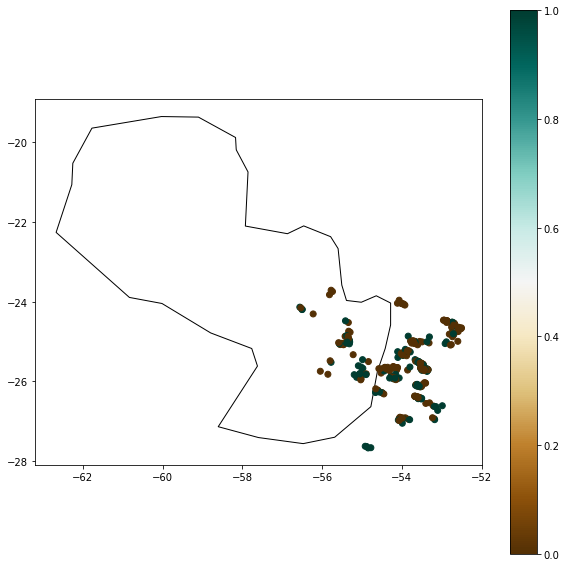

In [52]:
f, ax = plt.subplots(figsize=(10,10))
world[world.name=='Paraguay'].plot(color='white', edgecolor = 'black',ax=ax)
descargas_gpd.plot(ax=ax, column='FlashType',cmap='BrBG', legend=True)
plt.show()

C:\Users\AgOvi\AppData\Local\Temp\ipykernel_7100\786306529.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  descargas_clip=geopandas.clip(descargas_gpd,world[world.name=='Paraguay'])


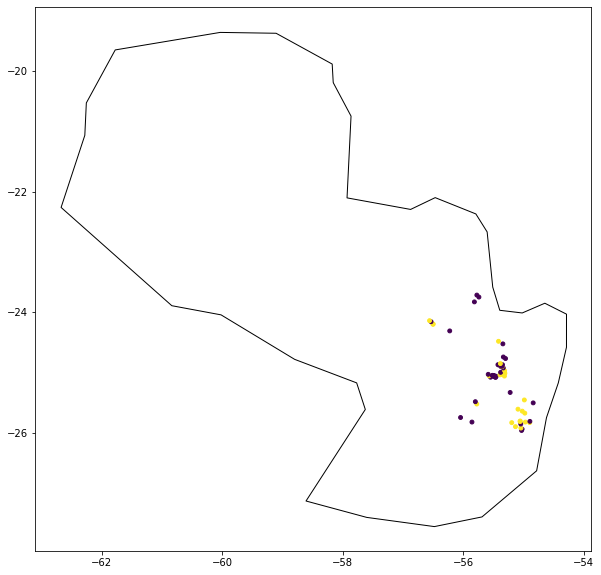

In [57]:
descargas_clip=geopandas.clip(descargas_gpd,world[world.name=='Paraguay'])

f, ax = plt.subplots(figsize=(10,10))
world[world.name=='Paraguay'].plot(color='white', edgecolor = 'black',ax=ax)
descargas_clip.plot(ax=ax, column='FlashType', markersize = 15)
plt.show()

In [88]:

m = world[world.name =='Paraguay'].explore(
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10,
     color = 'transparent',
     legend_kwds=dict(colorbar=False), # do not use colorbar
     name="countries" # name of the layer in the map
)

descargas_clip.explore(m=m,
                       column='FlashType',
                      color ='purple',
                      marker_kwds=dict(radius=10, fill=True),
                       legend_kwds=dict(colorbar=False),
                      tooltip ='FlashType',
                       tooltip_kwds=dict(labels=False),
                      name= 'FlashType')
folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map